# Exploratory Data Analysis - Retail (Level - Beginner)

## Author:- Pratyush Raj

### Task 3:- Performing Exploratory Data Analyisi on a dataset named 'SampleSuperstore.csv'.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
url="/content/drive/My Drive/datasets/SampleSuperstore.csv"
df=pd.read_csv(url)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [26]:
df2=df.copy()
df2.drop('Country',axis='columns',inplace=True)
df2.drop('Postal Code',axis='columns',inplace=True)
df2.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [27]:
pd.crosstab(index=df2['Category'],columns='count') 

col_0,count
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


In [28]:
pd.crosstab(index=df2['Segment'],columns='count')

col_0,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [30]:
# numerical data
numerical_data=df2.select_dtypes(exclude=[object])         
print(numerical_data.shape)

(9994, 4)


In [31]:
corr_matrix=numerical_data.corr()
corr_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


[Text(0.5, 0, 'Sales'),
 Text(1.5, 0, 'Quantity'),
 Text(2.5, 0, 'Discount'),
 Text(3.5, 0, 'Profit')]

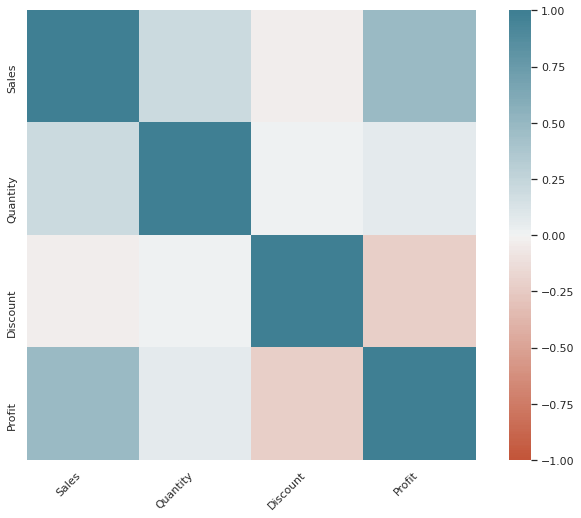

In [32]:
#visualing the correlation matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})                  
ax=sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [33]:
print(df2['Sales'].describe())

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


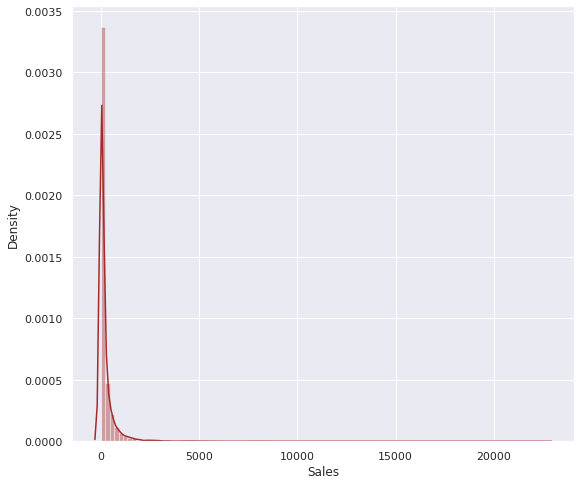

In [34]:
#plotting the sales column
plt.figure(figsize=(9,8))                                
sns.distplot(df2['Sales'],bins=100,color='brown')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f8748d68>,
      dtype=object)

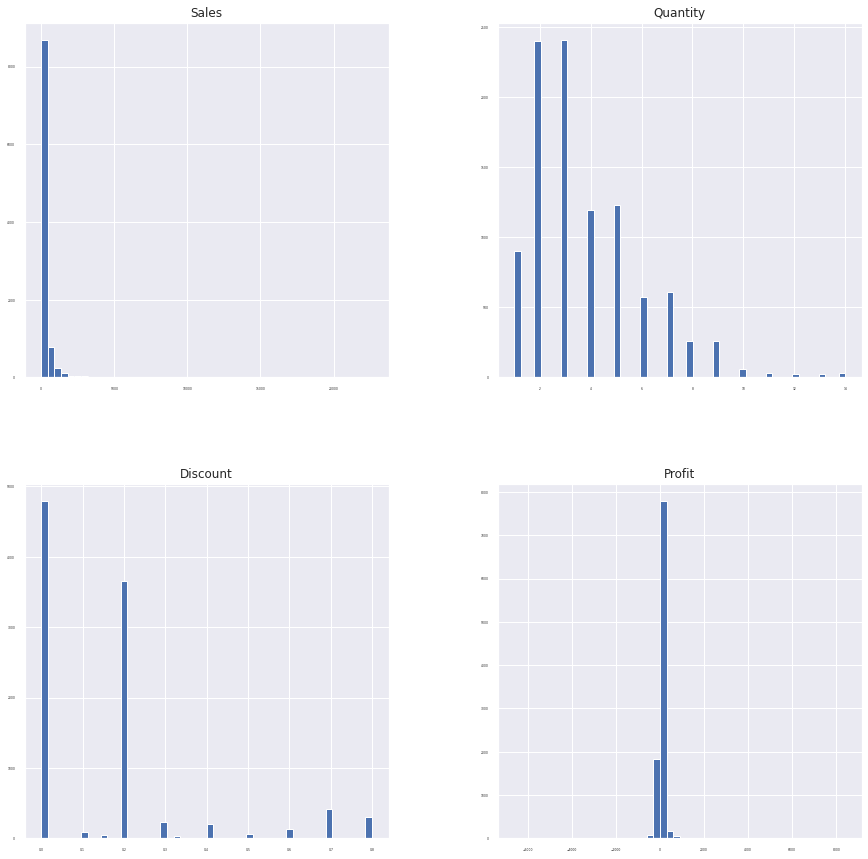

In [35]:
numerical_data.hist(figsize=(15,15),bins=50,xlabelsize=3,ylabelsize=3)

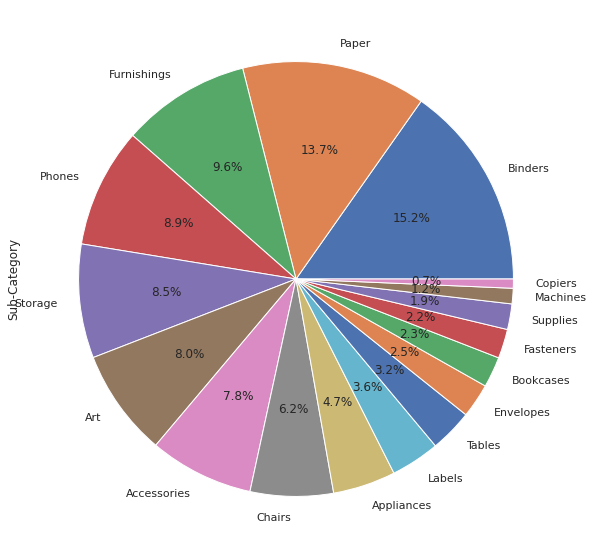

In [36]:
#visualising the count of each subcategory
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")       

Text(0.5, 1.0, 'sales per category with its subcategory')

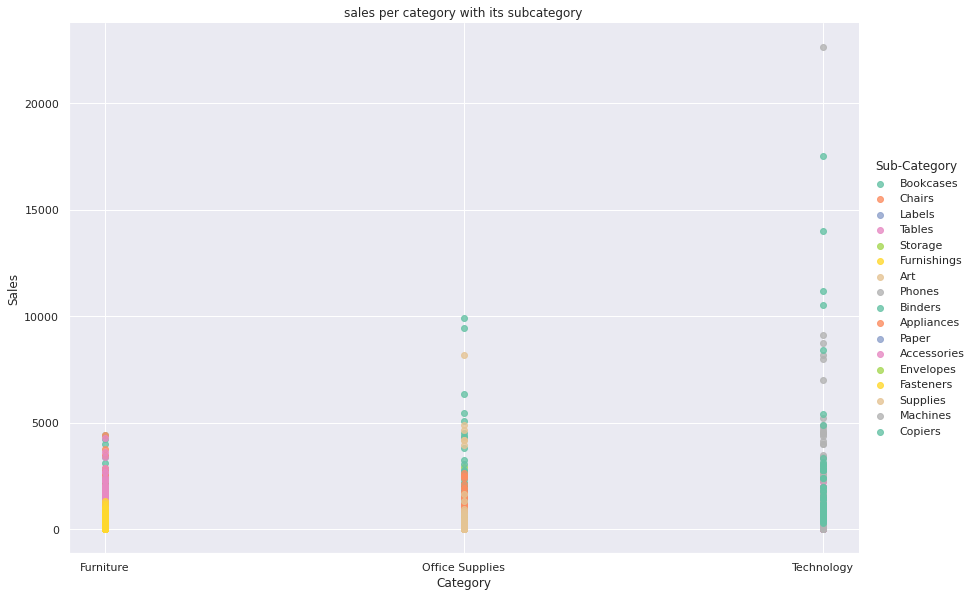

In [37]:
# visualising the sales per catogory with its subcategory
sns.lmplot(x='Category',y='Sales',data=df2,fit_reg=False,hue='Sub-Category',legend=True ,palette="Set2",height=8,aspect=15/10)
plt.title("sales per category with its subcategory")

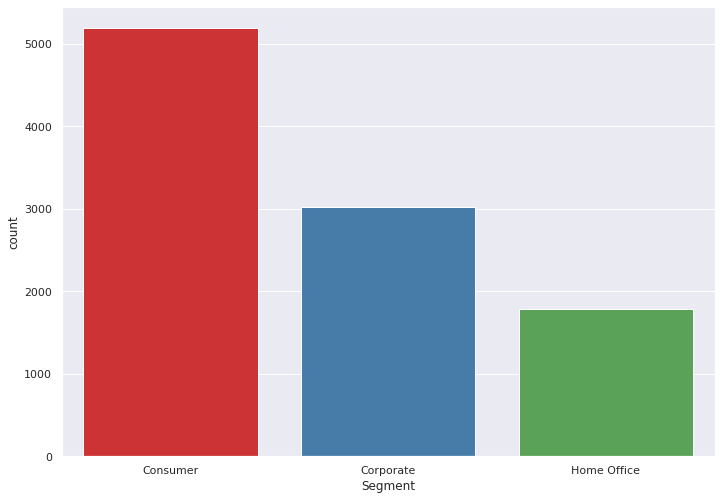

In [38]:
sns.set_style("darkgrid")
sns.countplot(x='Segment',data=df2,palette="Set1")

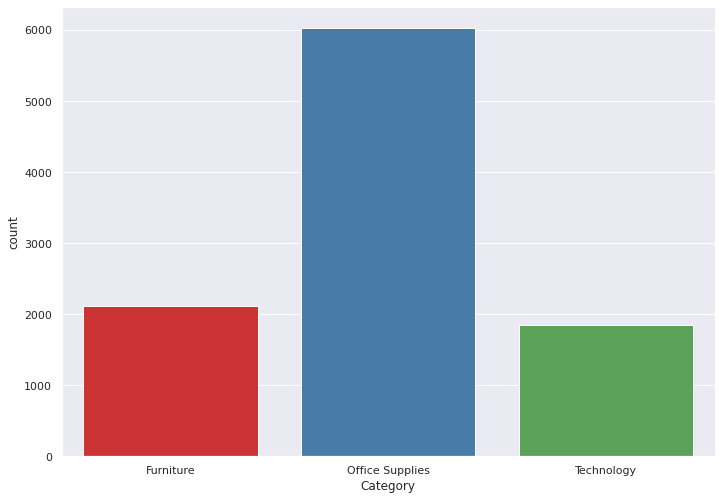

In [39]:
sns.set_style("darkgrid")
sns.countplot(x='Category',data=df2,palette="Set1")

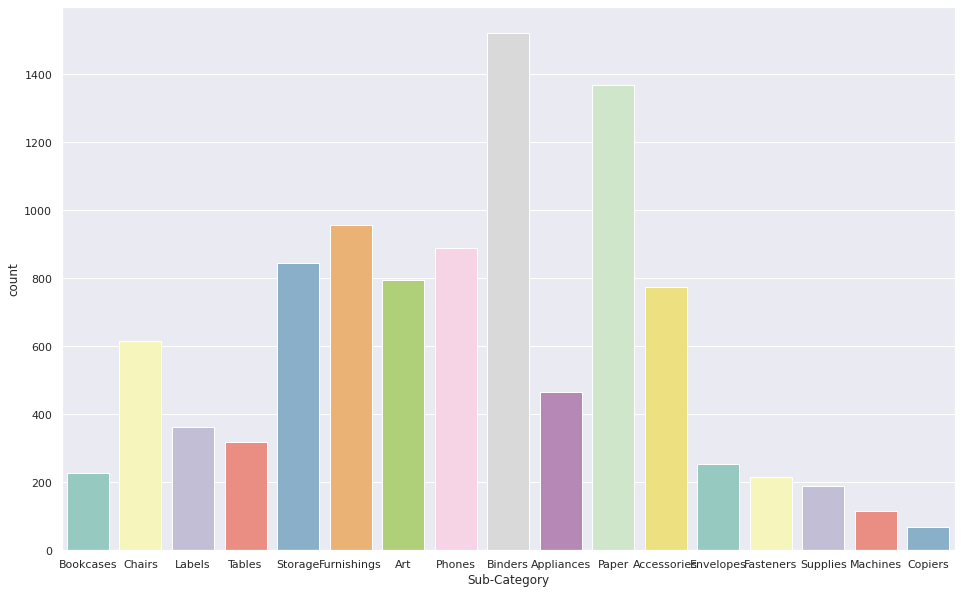

In [40]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='Sub-Category',data=df2,palette='Set3')

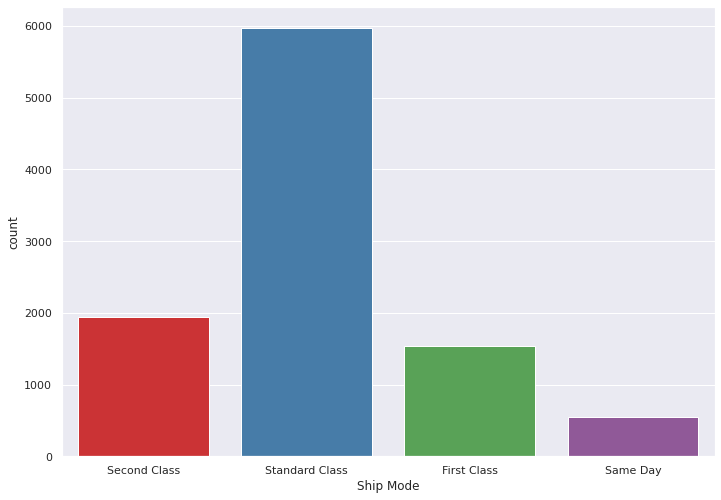

In [41]:
sns.set_style("darkgrid")
sns.countplot(x='Ship Mode',data=df2,palette="Set1")

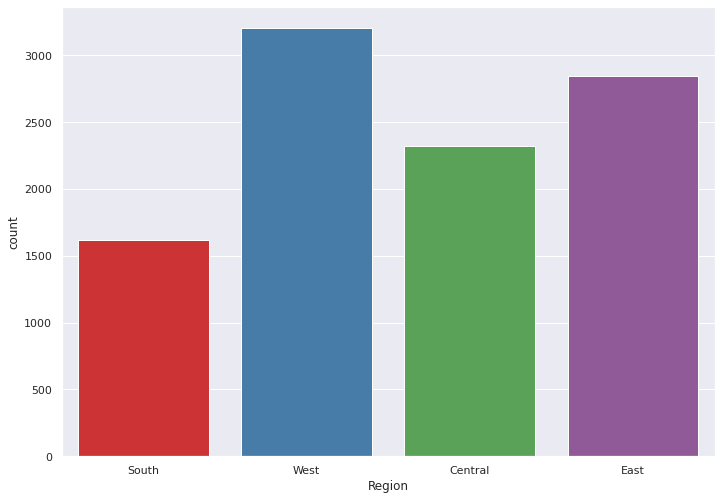

In [42]:
sns.set_style("darkgrid")
sns.countplot(x="Region",data=df2,palette="Set1")

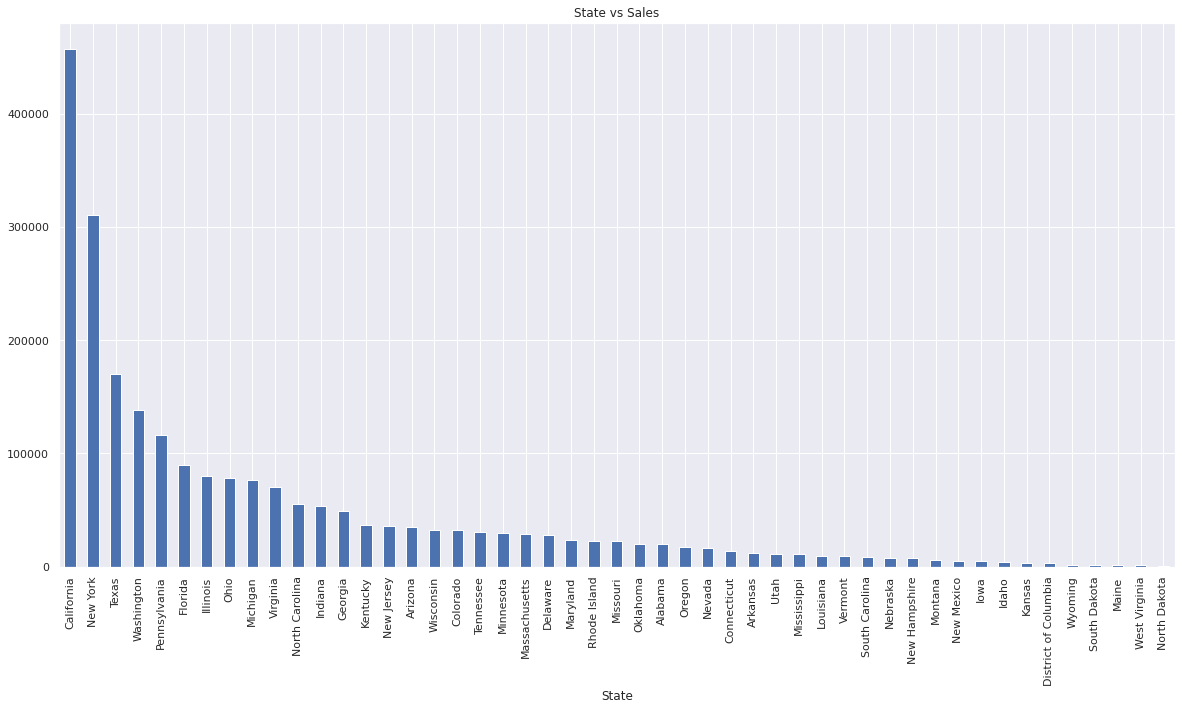

In [43]:
statewise=df2.groupby(['State'])['Sales'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title('State vs Sales')
statewise.plot.bar()

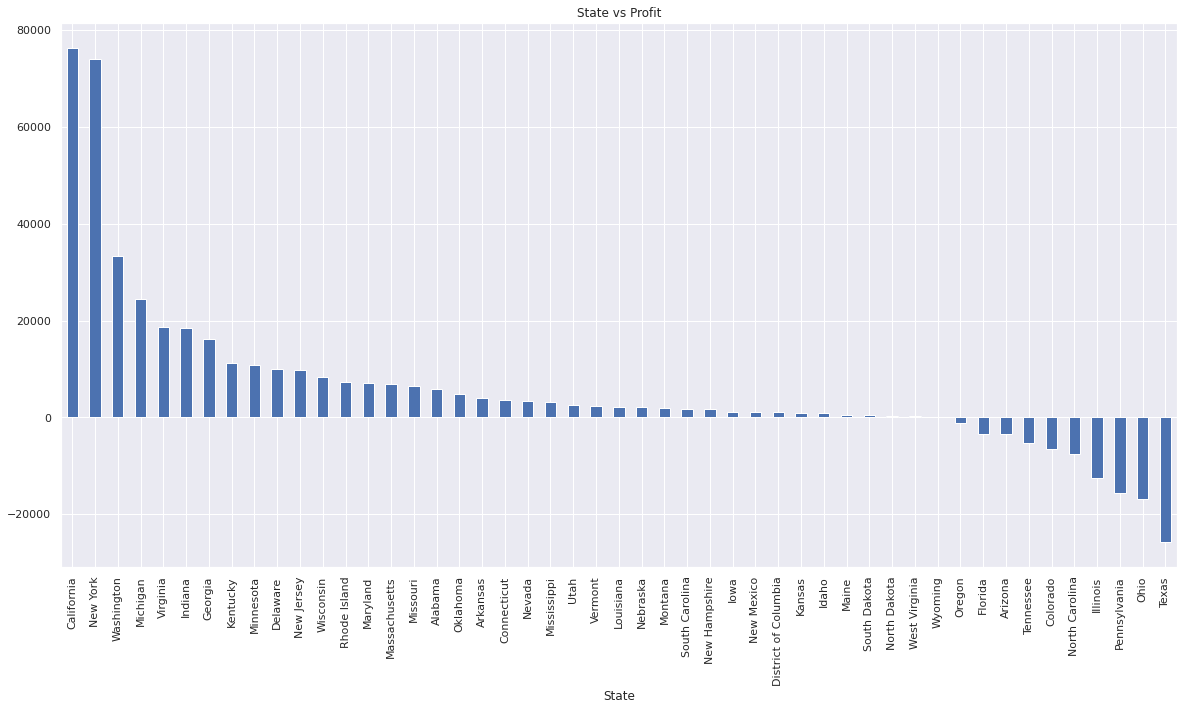

In [44]:
statewise=df2.groupby(['State'])['Profit'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title("State vs Profit")
statewise.plot.bar()

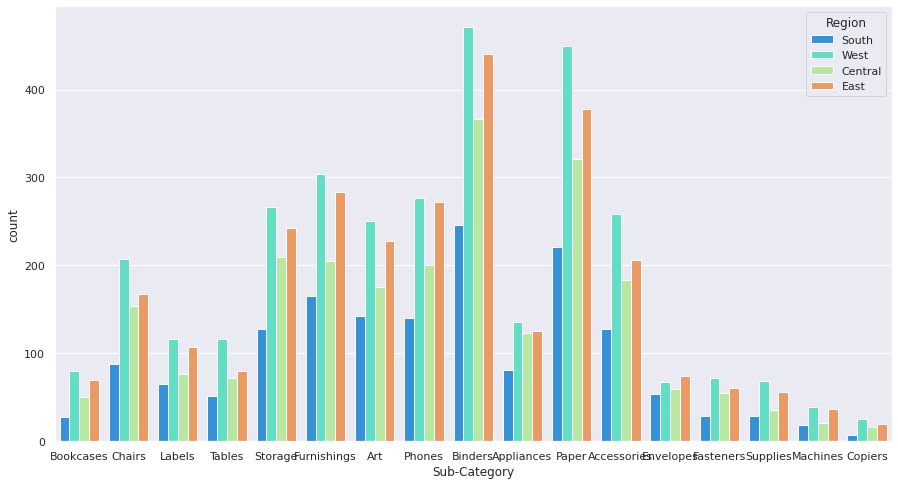

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df,palette="rainbow")
plt.show()

### From the above count plot, we can conclude that people residing in the west region order more as compared to other regions.

## Insights:
office Supplies has wide variety.

Technology has highest sales as compared to other categories.

People prefer to use standard shipment mode as compared to other modes.

Corporate segment has highest count as compared to others.

Maximum Profit earned from states like california and newyork, whereas texas and chio gives more loss and products like phones and copiers give more profit , whereas chairs and bookcases are on loss.

People from west region shop more as compared to other regions.

# Thank You!